In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import librosa

### read audio file

In [53]:
audio_path = 'audios/(trimmed)YOASOBI「群青」Official Music Video [music].wav'

In [54]:
# method 1. read using scipy.io -> wav file only
sr, data = read(audio_path)

In [178]:
# method 2. read using librosa -> for mp3 and wav, however channel number will equal to 1
data, sr = librosa.load(audio_path, sr=44100)

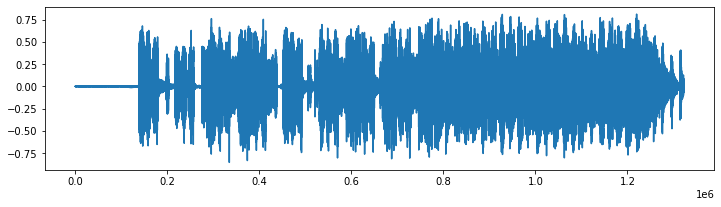

In [56]:
channel_size = data.ndim


if channel_size > 1:
    plt.figure(figsize=(12,6))
    for i in range(channel_size):
        plt.subplot(channel_size, 1, i+1)
        plt.plot(data[:, i])
else:
    plt.figure(figsize=(12, 3))
    plt.plot(data)
plt.show()

### Display Waveform - time domain

display amplitude of wave at specific time

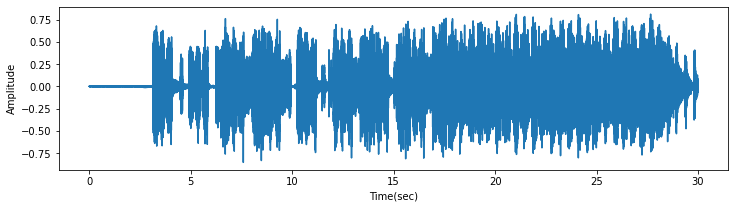

In [57]:
plt.figure(figsize=(12, 3))

time = np.arange(0, len(data)) * (1.0 / sr)

plt.plot(time, data)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

### Display Spectrum - frequency domain

display magnitude of wavelet at specific frequency

In [58]:
# fast fourier transform
ft = fft(data)

In [59]:
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

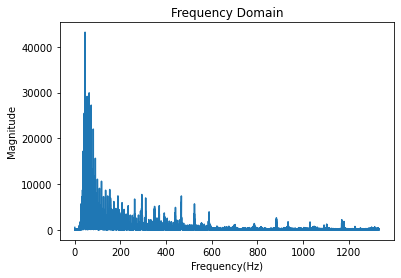

In [62]:
plt.plot(frequency[:40000], magnitude[:40000])

plt.title('Frequency Domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.show()

### Display spectrogram - time frequency domain

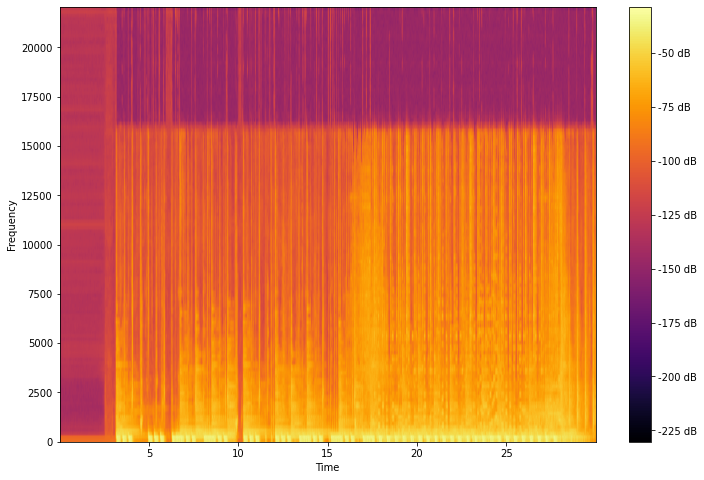

In [88]:
# method 1. plt.specgram
plt.figure(figsize=(12, 8))
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(data, Fs=sr, cmap='inferno')

plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show() 

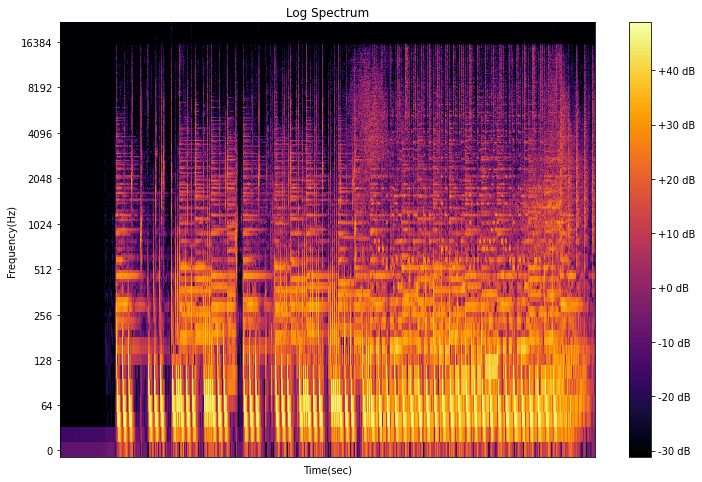

In [94]:
# method 2. librosa -> convert amplitude to db
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(data)))

# show
plt.figure(figsize=(12, 8))
librosa.display.specshow(spectrogram, y_axis='log',sr=sr, cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrum')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.show()

### beat tracker

In [90]:
tempo, beat_frames = librosa.beat.beat_track(y=data, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 136.00 beats per minute


In [93]:
Audio(data, rate=sr)

### create our own audio - https://www.youtube.com/watch?v=YE4E-jARmFs

In [111]:
import pandas as pd
import re

In [110]:
pitch_df = pd.read_html('https://pages.mtu.edu/~suits/notefreqs.html')[1]   # second table is what we want
pitch_df = pd.DataFrame([i.tolist() for i in pitch_df.to_numpy()], columns=['Note', 'Frequency(Hz)', 'Wavelength(cm)'])
pitch_df.head()

Note  Frequency(Hz)  Wavelength(cm)
0       C0          16.35         2109.89
1  C#0/Db0          17.32         1991.47
2       D0          18.35         1879.69
3  D#0/Eb0          19.45         1774.20
4       E0          20.60         1674.62

In [113]:
re.sub(r'/.+', '', 'C#0/Db1')

'C#0'

In [115]:
# pitch_df['Note'] = [re.sub(r'/.+', '', i) for i in pitch_df['Note'].to_list()]
pitch_df

Note  Frequency(Hz)  Wavelength(cm)
0     C0          16.35         2109.89
1    C#0          17.32         1991.47
2     D0          18.35         1879.69
3    D#0          19.45         1774.20
4     E0          20.60         1674.62
..   ...            ...             ...
103   G8        6271.93            5.50
104  G#8        6644.88            5.19
105   A8        7040.00            4.90
106  A#8        7458.62            4.63
107   B8        7902.13            4.37

[108 rows x 3 columns]

In [123]:
samplerate = 44100
def get_wave(freq, duration=0.5):
    """
    Function takes the "frequecy" and "time_duration" for a wave
    as the input and returns a "numpy array" of values at all points
    in time
    """
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    return wave

In [116]:
def get_piano_notes():
    octave = pitch_df['Note'].to_list()
    freq = pitch_df['Frequency(Hz)'].to_list()
    
    note_freqs = {note: sound for note, sound in zip(octave, freq)}
    note_freqs[''] = 0.0
    
    return note_freqs

In [118]:
note_freqs = get_piano_notes()
note_freqs

{'C0': 16.35,
 'C#0': 17.32,
 'D0': 18.35,
 'D#0': 19.45,
 'E0': 20.6,
 'F0': 21.83,
 'F#0': 23.12,
 'G0': 24.5,
 'G#0': 25.96,
 'A0': 27.5,
 'A#0': 29.14,
 'B0': 30.87,
 'C1': 32.7,
 'C#1': 34.65,
 'D1': 36.71,
 'D#1': 38.89,
 'E1': 41.2,
 'F1': 43.65,
 'F#1': 46.25,
 'G1': 49.0,
 'G#1': 51.91,
 'A1': 55.0,
 'A#1': 58.27,
 'B1': 61.74,
 'C2': 65.41,
 'C#2': 69.3,
 'D2': 73.42,
 'D#2': 77.78,
 'E2': 82.41,
 'F2': 87.31,
 'F#2': 92.5,
 'G2': 98.0,
 'G#2': 103.83,
 'A2': 110.0,
 'A#2': 116.54,
 'B2': 123.47,
 'C3': 130.81,
 'C#3': 138.59,
 'D3': 146.83,
 'D#3': 155.56,
 'E3': 164.81,
 'F3': 174.61,
 'F#3': 185.0,
 'G3': 196.0,
 'G#3': 207.65,
 'A3': 220.0,
 'A#3': 233.08,
 'B3': 246.94,
 'C4': 261.63,
 'C#4': 277.18,
 'D4': 293.66,
 'D#4': 311.13,
 'E4': 329.63,
 'F4': 349.23,
 'F#4': 369.99,
 'G4': 392.0,
 'G#4': 415.3,
 'A4': 440.0,
 'A#4': 466.16,
 'B4': 493.88,
 'C5': 523.25,
 'C#5': 554.37,
 'D5': 587.33,
 'D#5': 622.25,
 'E5': 659.25,
 'F5': 698.46,
 'F#5': 739.99,
 'G5': 783.99,
 

In [130]:
def get_song_data(music_notes):
    """
    Function to concatenate all the waves (notes)
    """
    note_freqs = get_piano_notes()
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

music_notes = 'F#3-F#4-A#4-C#5-D#5-F#5-F#4-C#5-G#4-F#4-F4-F#4-F#3-F#4-A#4-C#5-D#5-F#5-F#4-C#5-G#4-F#4-F4-F#4-D#3-F#4-A#4-C#5-D#5-F#5-F#4-C#5-G#4-F#4-F4-F#4'
data = get_song_data(music_notes)
data = data * (16300/np.max(data))

In [133]:
write('fade_into_darkness.wav', samplerate, data=data.astype(np.int16))

In [134]:
Audio('fade_into_darkness.wav', rate=samplerate)

### spetrogram of the audio

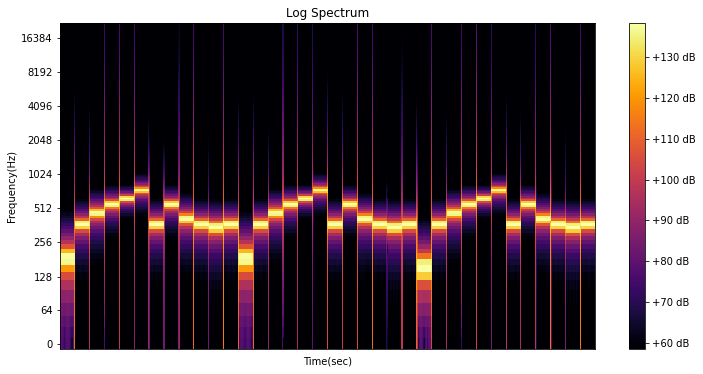

In [149]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(data)))

# show
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram, y_axis='log',sr=sr, cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrum')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.show()

### create a chord

In [189]:
root = get_wave(note_freqs['C4'])
third = get_wave(note_freqs['E4'])
fifth = get_wave(note_freqs['G4'])
root.shape

(22050,)

In [198]:
def get_chord(notes, duration=1):
    chord = None
    for note in notes:
        pitch = get_wave(note_freqs[note], duration=duration)
        if chord is None:
            chord = pitch
        else:
            chord += pitch
    return chord

In [199]:
get_chord(['C4', 'E4', 'G4'])

array([    0.        ,   573.59998551,  1145.85072148, ...,
       -5935.00799479, -5958.85990075, -5971.71099584])

In [190]:
np_chord = np.concatenate((root, third, fifth))
np_chord.shape

(66150,)

In [191]:
np_chord = root + third + fifth

In [172]:
new_np_chord = []
for i in range(len(root)):
    new_np_chord.extend([root[i], third[i], fifth[i]])


In [173]:
new_np_chord = np.array(new_np_chord)


In [177]:
new_np_chord.shape

(66150,)

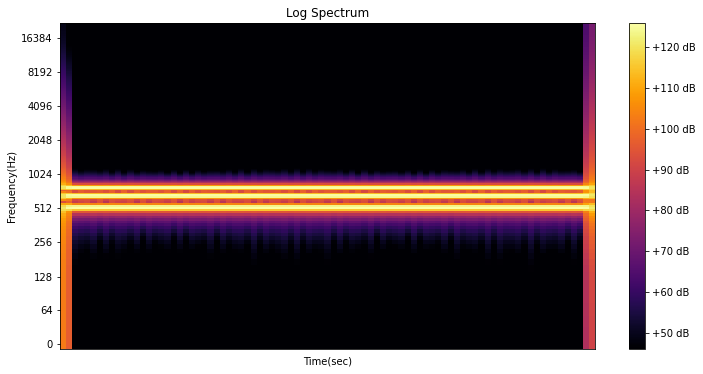

In [200]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(get_chord(['C5', 'E5', 'G5']))))

# show
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram, y_axis='log',sr=sr, cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrum')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.show()

In [207]:
note_freqs

{'C0': 16.35,
 'C#0': 17.32,
 'D0': 18.35,
 'D#0': 19.45,
 'E0': 20.6,
 'F0': 21.83,
 'F#0': 23.12,
 'G0': 24.5,
 'G#0': 25.96,
 'A0': 27.5,
 'A#0': 29.14,
 'B0': 30.87,
 'C1': 32.7,
 'C#1': 34.65,
 'D1': 36.71,
 'D#1': 38.89,
 'E1': 41.2,
 'F1': 43.65,
 'F#1': 46.25,
 'G1': 49.0,
 'G#1': 51.91,
 'A1': 55.0,
 'A#1': 58.27,
 'B1': 61.74,
 'C2': 65.41,
 'C#2': 69.3,
 'D2': 73.42,
 'D#2': 77.78,
 'E2': 82.41,
 'F2': 87.31,
 'F#2': 92.5,
 'G2': 98.0,
 'G#2': 103.83,
 'A2': 110.0,
 'A#2': 116.54,
 'B2': 123.47,
 'C3': 130.81,
 'C#3': 138.59,
 'D3': 146.83,
 'D#3': 155.56,
 'E3': 164.81,
 'F3': 174.61,
 'F#3': 185.0,
 'G3': 196.0,
 'G#3': 207.65,
 'A3': 220.0,
 'A#3': 233.08,
 'B3': 246.94,
 'C4': 261.63,
 'C#4': 277.18,
 'D4': 293.66,
 'D#4': 311.13,
 'E4': 329.63,
 'F4': 349.23,
 'F#4': 369.99,
 'G4': 392.0,
 'G#4': 415.3,
 'A4': 440.0,
 'A#4': 466.16,
 'B4': 493.88,
 'C5': 523.25,
 'C#5': 554.37,
 'D5': 587.33,
 'D#5': 622.25,
 'E5': 659.25,
 'F5': 698.46,
 'F#5': 739.99,
 'G5': 783.99,
 

In [224]:
cmaj = ['C3', 'E3', 'G3']
gmaj = ['G3', 'B4', 'D4']
dmaj = ['D4', 'F#4', 'A5']

In [225]:
chord_list = [cmaj, gmaj, dmaj]

In [226]:
get_chord(chord_list[0])

array([    0.        ,   286.87852671,   573.58832411, ...,
       -7965.51469423, -7792.89201128, -7616.7289724 ])

In [227]:
chords = np.concatenate([get_chord(_chord) for _chord in chord_list])
chords

array([    0.        ,   286.87852671,   573.58832411, ...,
       -4965.17674785, -4347.98756678, -3715.55715085])

In [228]:
write('test1.wav', samplerate, data=chords.astype(np.int16))

In [229]:
Audio('test1.wav', rate=samplerate)

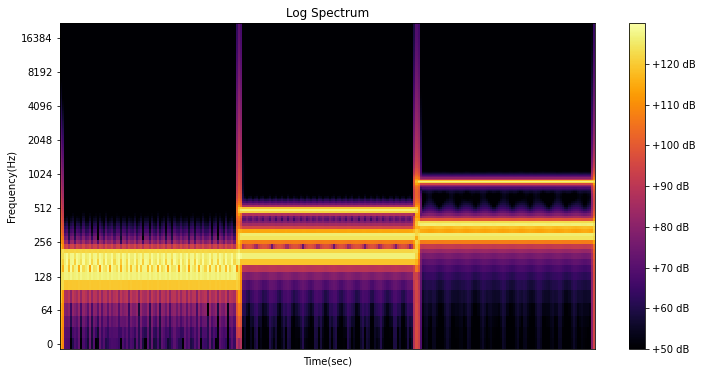

In [230]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(chords)))

# show
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram, y_axis='log',sr=sr, cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrum')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.show()

### create scales

In [250]:
# chro_scale = ['C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'A#4', 'B4', 'C5']
# chromatic = get_song_data('-'.join(chro_scale))

c_scale = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']
scale = get_song_data('-'.join(c_scale))

In [251]:
write('cmaj_scale1.wav', samplerate, data=scale.astype(np.int16))

In [254]:
Audio('cmaj_scale1.wav', rate=samplerate)

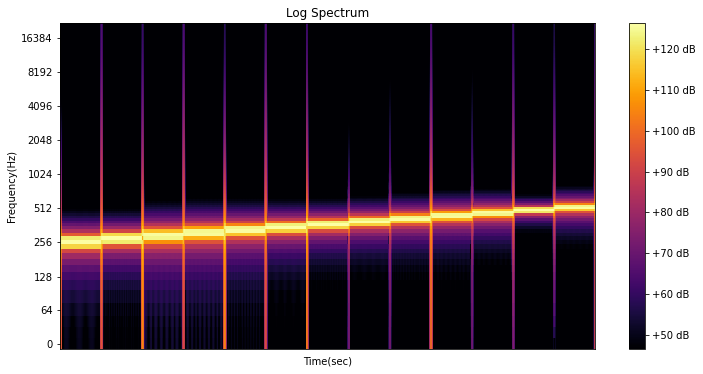

In [248]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(chromatic)))

# show
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram, y_axis='log',sr=sr, cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrum')
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.show()